In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob

In [3]:
index_list = glob.glob('./crawling_data/x_data/index/*.csv')
exchage_list = glob.glob('./crawling_data/x_data/exchange/*.csv')
fuel_list = glob.glob('./crawling_data/x_data/fuel/*.csv')

In [4]:
index_dutch = pd.read_csv(index_list[0],index_col=0)
index_euro = pd.read_csv(index_list[1],index_col=0)
index_london = pd.read_csv(index_list[2],index_col=0)
index_nasdaq = pd.read_csv(index_list[3],index_col=0)
index_paris = pd.read_csv(index_list[4],index_col=0)
index_shanghai = pd.read_csv(index_list[5],index_col=0)

In [5]:
exchange_cny = pd.read_csv(exchage_list[0],index_col=0)
exchange_eur = pd.read_csv(exchage_list[1],index_col=0)
exchange_gbp = pd.read_csv(exchage_list[2],index_col=0)
exchange_usd = pd.read_csv(exchage_list[3],index_col=0)

In [6]:
fuel_dubai = pd.read_csv(fuel_list[0],index_col=0)
fuel_brent = pd.read_csv(fuel_list[1],index_col=0)
fuel_texas = pd.read_csv(fuel_list[2],index_col=0)

In [7]:
index_dutch.drop(['start','high','low'], axis=1, inplace=True)
index_euro.drop(['start','high','low'], axis=1, inplace=True)
index_london.drop(['start','high','low'], axis=1, inplace=True)
index_nasdaq.drop(['start','high','low'], axis=1, inplace=True)
index_paris.drop(['start','high','low'], axis=1, inplace=True)
index_shanghai.drop(['start','high','low'], axis=1, inplace=True)
index_dutch.columns = ['date','dutch_close']
index_euro.columns = ['date','euro_close']
index_london.columns = ['date','london_close']
index_nasdaq.columns = ['date','nasdaq_close']
index_paris.columns = ['date','paris_close']
index_shanghai.columns = ['date','shanghai_close']

In [8]:
exchange_cny.columns = ['date','cny_exchange']
exchange_eur.columns = ['date','eur_exchange']
exchange_gbp.columns = ['date','gbp_exchange']
exchange_usd.columns = ['date','usd_exchange']

In [9]:
fuel_dubai.columns = ['date', 'dubai_fuel']
fuel_brent.columns = ['date', 'brent_fuel']
fuel_texas.columns = ['date', 'texas_fuel']
fuel_dubai.date = fuel_dubai.date.apply(lambda x : x.replace('-','.'))
fuel_brent.date = fuel_brent.date.apply(lambda x : x.replace('-','.'))
fuel_texas.date = fuel_texas.date.apply(lambda x : x.replace('-','.'))

In [10]:
data_df = pd.merge(left = index_dutch , right = index_euro, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_london, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_nasdaq, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_paris, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_shanghai, how = "inner", on = "date")

data_df = pd.merge(left = data_df , right = exchange_cny, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = exchange_eur, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = exchange_gbp, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = exchange_usd, how = "inner", on = "date")

data_df = pd.merge(left = data_df , right = fuel_dubai, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = fuel_brent, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = fuel_texas, how = "inner", on = "date")
data_df.date = data_df.date.apply(lambda x : pd.to_datetime(x, format='%Y.%m.%d'))

In [11]:
carbon_credit = pd.read_excel('./crawling_data/배출권.xls')
carbon_credit.dropna(inplace=True)
carbon_credit.reset_index(inplace=True)
carbon_credit.drop('index', axis=1, inplace=True)
carbon_credit.columns = ['date','carbon_credit_price']
carbon_credit.drop([0,1], inplace=True)
carbon_credit.date = carbon_credit.date.apply(lambda x : pd.to_datetime(x, format='%Y-%m-%d'))

In [12]:
merge_df = pd.merge(left = data_df , right = carbon_credit, how = "inner", on = "date")
merge_df.sort_index(ascending=False, inplace=True)
merge_df = merge_df.reset_index().drop('index', axis=1)
merge_df.sort_index(ascending=True, inplace=True)
merge_df.set_index(merge_df['date'], inplace=True)
merge_df.drop('date', axis=1, inplace=True)
merge_df

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2015-12-29,"10,860.14","3,314.28","6,314.57","5,107.94","4,701.36","3,563.74",177.71,"1,283.25","1,741.53","1,168.50",34.66,37.79,37.87,37.32
2015-12-30,"10,743.01","3,287.98","6,274.05","5,065.85","4,677.14","3,572.88",178.10,"1,283.14","1,738.97","1,173.00",34.57,36.46,36.60,37.05
2016-01-04,"10,283.44","3,164.76","6,093.43","4,903.09","4,522.45","3,296.26",179.60,"1,299.65","1,756.77","1,189.50",32.10,37.22,36.76,36.29
2016-01-05,"10,310.10","3,178.01","6,137.24","4,891.43","4,537.63","3,287.71",179.00,"1,283.71","1,746.66","1,189.50",30.84,36.42,35.97,36.06
2016-01-06,"10,214.02","3,139.32","6,073.38","4,835.77","4,480.47","3,361.84",178.65,"1,287.96","1,756.44","1,200.00",28.99,34.23,33.97,34.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,"15,757.06","4,223.97","7,277.62","15,235.72","6,766.51","3,597.64",183.02,"1,356.40","1,613.44","1,167.00",83.23,85.65,84.65,267.61
2021-10-27,"15,705.81","4,220.88","7,253.27","15,235.84","6,753.52","3,562.31",183.56,"1,360.73","1,609.51","1,173.50",81.44,83.87,82.66,268.01
2021-10-28,"15,696.33","4,233.87","7,249.47","15,448.12","6,804.22","3,518.42",183.04,"1,358.48","1,610.84","1,170.50",81.27,83.66,82.81,262.06


In [13]:
merge_df['dutch_close'] = pd.to_numeric(merge_df['dutch_close'].apply(lambda x : x.replace(',','')))
merge_df['euro_close'] = pd.to_numeric(merge_df['euro_close'].apply(lambda x : x.replace(',','')))
merge_df['london_close'] = pd.to_numeric(merge_df['london_close'].apply(lambda x : x.replace(',','')))
merge_df['nasdaq_close'] = pd.to_numeric(merge_df['nasdaq_close'].apply(lambda x : x.replace(',','')))
merge_df['paris_close'] = pd.to_numeric(merge_df['paris_close'].apply(lambda x : x.replace(',','')))
merge_df['shanghai_close'] = pd.to_numeric(merge_df['shanghai_close'].apply(lambda x : x.replace(',','')))

merge_df['eur_exchange'] = pd.to_numeric(merge_df['eur_exchange'].apply(lambda x : x.replace(',','')))
merge_df['gbp_exchange'] = pd.to_numeric(merge_df['gbp_exchange'].apply(lambda x : x.replace(',','')))
merge_df['usd_exchange'] = pd.to_numeric(merge_df['usd_exchange'].apply(lambda x : x.replace(',','')))

merge_df['carbon_credit_price'] = pd.to_numeric(merge_df['carbon_credit_price'])
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2015-12-29 to 2021-11-01
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dutch_close          1304 non-null   float64
 1   euro_close           1304 non-null   float64
 2   london_close         1304 non-null   float64
 3   nasdaq_close         1304 non-null   float64
 4   paris_close          1304 non-null   float64
 5   shanghai_close       1304 non-null   float64
 6   cny_exchange         1304 non-null   float64
 7   eur_exchange         1304 non-null   float64
 8   gbp_exchange         1304 non-null   float64
 9   usd_exchange         1304 non-null   float64
 10  dubai_fuel           1304 non-null   float64
 11  brent_fuel           1304 non-null   float64
 12  texas_fuel           1304 non-null   float64
 13  carbon_credit_price  1304 non-null   float64
dtypes: float64(14)
memory usage: 152.8 KB


In [ ]:
#################### 여기까지 공통

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
### rolling 3,5,7의 평균으로

In [20]:
# 초기화
df = merge_df.copy()
x_df = df.drop('carbon_credit_price',axis=1)
y_df = df['carbon_credit_price'].shift(-1)
x_df = (x_df.rolling(3).mean() + x_df.rolling(5).mean() + x_df.rolling(7).mean())/3
con_df_357 = pd.concat([x_df,y_df],axis=1)
con_df_357.dropna(inplace=True)
x_r_357 = con_df_357.drop('carbon_credit_price',axis=1)
y_r_357 = con_df_357['carbon_credit_price']

# x_train_357, x_test_357, y_train_357, y_test_357 = train_test_split(x_r_357, y_r_357, random_state=100)

x_train_357 = x_r_357[:1000]
y_train_357 = y_r_357[:1000]
x_test_357 = x_r_357[1000:]
y_test_357 = y_r_357[1000:]

scaler = StandardScaler()
scaler.fit(x_train_357)

x_train_scaled_357 = scaler.transform(x_train_357)
x_test_scaled_357 = scaler.transform(x_test_357)

In [21]:
x_r_357 = con_df_357.drop('carbon_credit_price',axis=1)
y_r_357 = con_df_357['carbon_credit_price']

# x_train_357, x_test_357, y_train_357, y_test_357 = train_test_split(x_r_357, y_r_357, random_state=100)

x_train_357 = x_r_357[:1000]
y_train_357 = y_r_357[:1000]
x_test_357 = x_r_357[1000:]
y_test_357 = y_r_357[1000:]

scaler = StandardScaler()
scaler.fit(x_train_357)

x_train_scaled_357 = scaler.transform(x_train_357)
x_test_scaled_357 = scaler.transform(x_test_357)

In [22]:
lr = LinearRegression()
lr.fit(x_train_scaled_357, y_train_357)
lr_preds = lr.predict(x_test_scaled_357)
print(lr.__class__.__name__)
print(lr.score(x_test_scaled_357, y_test_357))
print('mse : ',np.sqrt(mean_squared_error(y_test_357, lr_preds)))
print('r_score : ', r2_score(y_test_357, lr_preds))
print()

rid = Ridge()
rid.fit(x_train_scaled_357, y_train_357)
rid_preds = rid.predict(x_test_scaled_357)
print(rid.__class__.__name__)
print(rid.score(x_test_scaled_357, y_test_357))
print('mse : ',np.sqrt(mean_squared_error(y_test_357, rid_preds)))
print('r_score : ', r2_score(y_test_357, rid_preds))
print()

las = Lasso()
las.fit(x_train_scaled_357, y_train_357)
las_preds = las.predict(x_test_scaled_357)
print(las.__class__.__name__)
print(las.score(x_test_scaled_357, y_test_357))
print('mse : ',np.sqrt(mean_squared_error(y_test_357, las_preds)))
print('r_score : ', r2_score(y_test_357, las_preds))
print()

xgb = XGBRegressor()
xgb.fit(x_train_scaled_357, y_train_357)
xgb_preds = xgb.predict(x_test_scaled_357)
print(xgb.__class__.__name__)
print(xgb.score(x_test_scaled_357, y_test_357))
print('mse : ',np.sqrt(mean_squared_error(y_test_357, xgb_preds)))
print('r_score : ', r2_score(y_test_357, xgb_preds))
print()

lgbm = LGBMRegressor()
lgbm.fit(x_train_scaled_357, y_train_357)
lgbm_preds = lgbm.predict(x_test_scaled_357)
print(lgbm.__class__.__name__)
print(lgbm.score(x_test_scaled_357, y_test_357))
print('mse : ',np.sqrt(mean_squared_error(y_test_357, lgbm_preds)))
print('r_score : ', r2_score(y_test_357, lgbm_preds))
print()

rfr = RandomForestRegressor()
rfr.fit(x_train_scaled_357, y_train_357)
rfr_preds = rfr.predict(x_test_scaled_357)
print(rfr.__class__.__name__)
print(rfr.score(x_test_scaled_357, y_test_357))
print('mse : ',np.sqrt(mean_squared_error(y_test_357, rfr_preds)))
print('r_score : ', r2_score(y_test_357, rfr_preds))
print()

LinearRegression
0.33887741740437194
mse :  46.414496361728375
r_score :  0.33887741740437194

Ridge
0.3263359125979529
mse :  46.85266991329747
r_score :  0.3263359125979529

Lasso
0.5641009556960884
mse :  37.68821812289547
r_score :  0.5641009556960884

XGBRegressor
-2.269970873547596
mse :  103.22492796510612
r_score :  -2.269970873547596

LGBMRegressor
-2.705651186220327
mse :  109.88664518148228
r_score :  -2.705651186220327

RandomForestRegressor
-2.018568151487444
mse :  99.17749598300986
r_score :  -2.018568151487444



In [ ]:
### rolling 5

In [32]:
# 초기화
df = merge_df.copy()
x_df = df.drop('carbon_credit_price',axis=1)
y_df = df['carbon_credit_price'].shift(-1)

In [33]:
x_df = x_df.rolling(5).mean()
con_df_5 = pd.concat([x_df,y_df],axis=1)
con_df_5.dropna(inplace=True)

In [34]:
x_r_5 = con_df_5.drop('carbon_credit_price',axis=1)
y_r_5 = con_df_5['carbon_credit_price']

x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(x_r_5, y_r_5, random_state=100)

# x_train_5 = x_r_5[:1000]
# y_train_5 = y_r_5[:1000]
# x_test_5 = x_r_5[1000:]
# y_test_5 = y_r_5[1000:]

scaler = StandardScaler()
scaler.fit(x_train_5)

x_train_scaled_5 = scaler.transform(x_train_5)
x_test_scaled_5 = scaler.transform(x_test_5)

In [36]:
lr = LinearRegression()
lr.fit(x_train_scaled_5, y_train_5)
lr_preds = lr.predict(x_test_scaled_5)
print(lr.__class__.__name__)
print(lr.score(x_test_scaled_5, y_test_5))
print('mse : ',np.sqrt(mean_squared_error(y_test_5, lr_preds)))
print('r_score : ', r2_score(y_test_5, lr_preds))
print()

rid = Ridge()
rid.fit(x_train_scaled_5, y_train_5)
rid_preds = rid.predict(x_test_scaled_5)
print(rid.__class__.__name__)
print(rid.score(x_test_scaled_5, y_test_5))
print('mse : ',np.sqrt(mean_squared_error(y_test_5, rid_preds)))
print('r_score : ', r2_score(y_test_5, rid_preds))
print()

las = LinearRegression()
las.fit(x_train_scaled_5, y_train_5)
las_preds = las.predict(x_test_scaled_5)
print(las.__class__.__name__)
print(las.score(x_test_scaled_5, y_test_5))
print('mse : ',np.sqrt(mean_squared_error(y_test_5, las_preds)))
print('r_score : ', r2_score(y_test_5, las_preds))
print()

xgb = XGBRegressor()
xgb.fit(x_train_scaled_5, y_train_5)
xgb_preds = xgb.predict(x_test_scaled_5)
print(xgb.__class__.__name__)
print(xgb.score(x_test_scaled_5, y_test_5))
print('mse : ',np.sqrt(mean_squared_error(y_test_5, xgb_preds)))
print('r_score : ', r2_score(y_test_5, xgb_preds))
print()

lgbm = LGBMRegressor()
lgbm.fit(x_train_scaled_5, y_train_5)
lgbm_preds = lgbm.predict(x_test_scaled_5)
print(lgbm.__class__.__name__)
print(lgbm.score(x_test_scaled_5, y_test_5))
print('mse : ',np.sqrt(mean_squared_error(y_test_5, lgbm_preds)))
print('r_score : ', r2_score(y_test_5, lgbm_preds))
print()

rfr = RandomForestRegressor()
rfr.fit(x_train_scaled_5, y_train_5)
rfr_preds = rfr.predict(x_test_scaled_5)
print(rfr.__class__.__name__)
print(rfr.score(x_test_scaled_5, y_test_5))
print('mse : ',np.sqrt(mean_squared_error(y_test_5, rfr_preds)))
print('r_score : ', r2_score(y_test_5, rfr_preds))
print()

LinearRegression
0.9581472027131347
mse :  13.026934888565748
r_score :  0.9581472027131347

Ridge
0.9578362616351981
mse :  13.075236482006801
r_score :  0.9578362616351981

LinearRegression
0.9581472027131347
mse :  13.026934888565748
r_score :  0.9581472027131347

XGBRegressor
0.9967441039577325
mse :  3.633417155269154
r_score :  0.9967441039577325

LGBMRegressor
0.996770934735994
mse :  3.6184152815808925
r_score :  0.996770934735994

RandomForestRegressor
0.9969748590461062
mse :  3.5022956522565964
r_score :  0.9969748590461062



In [ ]:
### rolling 5일과 20일 평균

In [41]:
# 초기화
df = merge_df.copy()
x_df = df.drop('carbon_credit_price',axis=1)
y_df = df['carbon_credit_price'].shift(-2)

In [42]:
x_df = (x_df.rolling(5).mean() + x_df.rolling(20).mean())/2
con_df_20 = pd.concat([x_df,y_df],axis=1)
con_df_20.dropna(inplace=True)

In [43]:
x_r_20 = con_df_20.drop('carbon_credit_price',axis=1)
y_r_20 = con_df_20['carbon_credit_price']

# x_train_20, x_test_20, y_train_20, y_test_20 = train_test_split(x_r_20, y_r_20, random_state=100)
x_train_20 = x_r_20[:1000]
y_train_20 = y_r_20[:1000]
x_test_20 = x_r_20[1000:]
y_test_20 = y_r_20[1000:]

scaler = StandardScaler()
scaler.fit(x_train_20)

x_train_scaled_20 = scaler.transform(x_train_20)
x_test_scaled_20 = scaler.transform(x_test_20)

In [44]:
lr = LinearRegression()
lr.fit(x_train_scaled_20, y_train_20)
lr_preds = lr.predict(x_test_scaled_20)
print(lr.__class__.__name__)
print(lr.score(x_test_scaled_20, y_test_20))
print('mse : ',np.sqrt(mean_squared_error(y_test_20, lr_preds)))
print('r_score : ', r2_score(y_test_20, lr_preds))
print()

rid = Ridge()
rid.fit(x_train_scaled_20, y_train_20)
rid_preds = rid.predict(x_test_scaled_20)
print(rid.__class__.__name__)
print(rid.score(x_test_scaled_20, y_test_20))
print('mse : ',np.sqrt(mean_squared_error(y_test_20, rid_preds)))
print('r_score : ', r2_score(y_test_20, rid_preds))
print()

las = Lasso()
las.fit(x_train_scaled_20, y_train_20)
las_preds = las.predict(x_test_scaled_20)
print(las.__class__.__name__)
print(las.score(x_test_scaled_20, y_test_20))
print('mse : ',np.sqrt(mean_squared_error(y_test_20, las_preds)))
print('r_score : ', r2_score(y_test_20, las_preds))
print()

xgb = XGBRegressor()
xgb.fit(x_train_scaled_20, y_train_20)
xgb_preds = xgb.predict(x_test_scaled_20)
print(xgb.__class__.__name__)
print(xgb.score(x_test_scaled_20, y_test_20))
print('mse : ',np.sqrt(mean_squared_error(y_test_20, xgb_preds)))
print('r_score : ', r2_score(y_test_20, xgb_preds))
print()

lgbm = LGBMRegressor()
lgbm.fit(x_train_scaled_20, y_train_20)
lgbm_preds = lgbm.predict(x_test_scaled_20)
print(lgbm.__class__.__name__)
print(lgbm.score(x_test_scaled_20, y_test_20))
print('mse : ',np.sqrt(mean_squared_error(y_test_20, lgbm_preds)))
print('r_score : ', r2_score(y_test_20, lgbm_preds))
print()

rfr = RandomForestRegressor()
rfr.fit(x_train_scaled_20, y_train_20)
rfr_preds = rfr.predict(x_test_scaled_20)
print(rfr.__class__.__name__)
print(rfr.score(x_test_scaled_20, y_test_20))
print('mse : ',np.sqrt(mean_squared_error(y_test_20, rfr_preds)))
print('r_score : ', r2_score(y_test_20, rfr_preds))
print()

LinearRegression
0.6400185736863011
mse :  34.053574442833636
r_score :  0.6400185736863011

Ridge
0.5933496722819435
mse :  36.19371990021636
r_score :  0.5933496722819435

Lasso
0.5949572116837729
mse :  36.12210991763549
r_score :  0.5949572116837729

XGBRegressor
-3.296098265090647
mse :  117.64128536489613
r_score :  -3.296098265090647

LGBMRegressor
-2.7510732861939347
mse :  109.92600184712586
r_score :  -2.7510732861939347

RandomForestRegressor
-2.4203673056617148
mse :  104.9685096321221
r_score :  -2.4203673056617148



In [ ]:
### feature 나눠서 해보기

In [ ]:
RandomForestRegressor

In [327]:
x_r_20

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel
date,,,,,,,,,,,,,
2016-01-28,9855.04475,3038.86875,5940.52075,4594.30475,4360.08075,2928.42200,181.64200,1305.25400,1725.46675,1201.5300,27.91650,32.49375,32.10975
2016-01-29,9831.81700,3034.32700,5953.12925,4584.23200,4361.00525,2889.87250,181.80675,1307.28925,1727.17100,1202.9800,28.34050,32.82975,32.14650
2016-02-01,9809.36175,3029.57575,5966.09050,4583.28300,4361.98500,2842.80575,181.98850,1308.67350,1727.67200,1204.2175,28.58075,33.14825,32.15000
2016-02-02,9767.63075,3016.15400,5962.86000,4568.55750,4348.74150,2829.11750,182.10150,1310.33175,1729.82400,1205.1050,28.67800,33.12775,31.82100
2016-02-03,9701.14875,2994.43550,5940.03450,4562.48475,4325.63475,2815.77500,182.34700,1313.55275,1732.88325,1207.1925,29.10325,33.28725,31.72675
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22,15485.03225,4151.56700,7161.58675,15005.82675,6661.70850,3588.61375,183.93150,1374.87400,1622.04125,1180.3875,79.56775,82.79825,80.21500
2021-10-25,15494.41425,4155.17400,7168.20475,15031.04050,6667.18300,3591.46725,183.84925,1372.79550,1620.00750,1178.7250,79.99700,83.17150,80.75450
2021-10-26,15522.06375,4162.83875,7180.74200,15043.55825,6681.42125,3590.45175,183.72175,1370.38725,1618.38400,1177.5500,80.43750,83.48325,81.27650


In [326]:
x_r_20.iloc[-1]

dutch_close       15569.23525
euro_close         4179.37475
london_close       7202.46650
nasdaq_close      15089.66800
paris_close        6707.14125
shanghai_close     3576.83850
cny_exchange        183.62575
eur_exchange       1367.26900
gbp_exchange       1615.65675
usd_exchange       1176.36250
dubai_fuel           80.85150
brent_fuel           83.60625
texas_fuel           81.75375
Name: 2021-10-28 00:00:00, dtype: float64

In [328]:
y_r_20[-1]

254.77

In [ ]:
scaler.fit(x_train_20)
x_train_scaled_20 = scaler.transform(x_train_20)

In [352]:
scaler.fit([x_r_20.iloc[-1]])
test = scaler.transform([x_r_20.iloc[-1]])

xgb.predict(test)
# r2_score(y_r_20[-1], rfr.predict(test))

array([114.26603], dtype=float32)

In [188]:
merge_df.head(2)

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2015-12-29,10860.14,3314.28,6314.57,5107.94,4701.36,3563.74,177.71,1283.25,1741.53,1168.5,34.66,37.79,37.87,37.32
2015-12-30,10743.01,3287.98,6274.05,5065.85,4677.14,3572.88,178.10,1283.14,1738.97,1173.0,34.57,36.46,36.60,37.05


In [45]:
# 초기화
df = merge_df.copy()
x_df = df[['dutch_close', 'euro_close', 'nasdaq_close', 'paris_close', 'eur_exchange']]
y_df = df['carbon_credit_price'].shift(-1)

In [46]:
x_df = (x_df.rolling(5).mean() + x_df.rolling(20).mean())/2
con_df_sub = pd.concat([x_df,y_df],axis=1)
con_df_sub.dropna(inplace=True)

In [47]:
x_r_sub = con_df_sub.drop('carbon_credit_price',axis=1)
y_r_sub = con_df_sub['carbon_credit_price']

# x_train_sub, x_test_sub, y_train_sub, y_test_sub = train_test_split(x_r_sub, y_r_sub, random_state=100)
x_train_sub = x_r_sub[:1000]
y_train_sub = y_r_sub[:1000]
x_test_sub = x_r_sub[1000:]
y_test_sub = y_r_sub[1000:]

scaler = StandardScaler()
scaler.fit(x_train_sub)

x_train_scaled_sub = scaler.transform(x_train_sub)
x_test_scaled_sub = scaler.transform(x_test_sub)

In [48]:
lr = LinearRegression()
lr.fit(x_train_scaled_sub, y_train_sub)
lr_preds = lr.predict(x_test_scaled_sub)
print(lr.__class__.__name__)
print(lr.score(x_test_scaled_sub, y_test_sub))
print('mse : ',np.sqrt(mean_squared_error(y_test_sub, lr_preds)))
print('r_score : ', r2_score(y_test_sub, lr_preds))
print()

rid = Ridge()
rid.fit(x_train_scaled_sub, y_train_sub)
rid_preds = rid.predict(x_test_scaled_sub)
print(rid.__class__.__name__)
print(rid.score(x_test_scaled_sub, y_test_sub))
print('mse : ',np.sqrt(mean_squared_error(y_test_sub, rid_preds)))
print('r_score : ', r2_score(y_test_sub, rid_preds))
print()

las = Lasso()
las.fit(x_train_scaled_sub, y_train_sub)
las_preds = las.predict(x_test_scaled_sub)
print(las.__class__.__name__)
print(las.score(x_test_scaled_sub, y_test_sub))
print('mse : ',np.sqrt(mean_squared_error(y_test_sub, las_preds)))
print('r_score : ', r2_score(y_test_sub, las_preds))
print()

xgb = XGBRegressor()
xgb.fit(x_train_scaled_sub, y_train_sub)
xgb_preds = xgb.predict(x_test_scaled_sub)
print(xgb.__class__.__name__)
print(xgb.score(x_test_scaled_sub, y_test_sub))
print('mse : ',np.sqrt(mean_squared_error(y_test_sub, xgb_preds)))
print('r_score : ', r2_score(y_test_sub, xgb_preds))
print()

lgbm = LGBMRegressor()
lgbm.fit(x_train_scaled_sub, y_train_sub)
lgbm_preds = lgbm.predict(x_test_scaled_sub)
print(lgbm.__class__.__name__)
print(lgbm.score(x_test_scaled_sub, y_test_sub))
print('mse : ',np.sqrt(mean_squared_error(y_test_sub, lgbm_preds)))
print('r_score : ', r2_score(y_test_sub, lgbm_preds))
print()

rfr = RandomForestRegressor()
rfr.fit(x_train_scaled_sub, y_train_sub)
rfr_preds = rfr.predict(x_test_scaled_sub)
print(rfr.__class__.__name__)
print(rfr.score(x_test_scaled_sub, y_test_sub))
print('mse : ',np.sqrt(mean_squared_error(y_test_sub, rfr_preds)))
print('r_score : ', r2_score(y_test_sub, rfr_preds))
print()

LinearRegression
0.6699792212019398
mse :  32.64035948787499
r_score :  0.6699792212019398

Ridge
0.6818252943346876
mse :  32.04919432205887
r_score :  0.6818252943346876

Lasso
0.7731802659141329
mse :  27.05980790883895
r_score :  0.7731802659141329

XGBRegressor
-1.3276377886672828
mse :  86.68460817561846
r_score :  -1.3276377886672828

LGBMRegressor
-1.2154350098561206
mse :  84.56950684420534
r_score :  -1.2154350098561206

RandomForestRegressor
-1.3213281033633413
mse :  86.5670375274806
r_score :  -1.3213281033633413



In [289]:
merge_df.tail(2)

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2021-10-29,15688.77,4250.56,7237.57,15498.39,6830.34,3547.34,183.35,1357.50,1606.33,1174.0,81.37,83.72,83.57,262.68
2021-11-01,15806.29,4280.47,7288.62,15595.92,6893.29,3544.48,184.34,1363.64,1608.89,1178.5,82.38,84.71,84.05,254.77


In [ ]:
scaler.fit(x_train_sub)
x_train_scaled_sub = scaler.transform(x_train_sub)

In [304]:
x_train_sub

,dutch_close,euro_close,nasdaq_close,paris_close,eur_exchange
date,,,,,
2016-01-28,9855.04475,3038.86875,4594.30475,4360.08075,1305.25400
2016-01-29,9831.81700,3034.32700,4584.23200,4361.00525,1307.28925
2016-02-01,9809.36175,3029.57575,4583.28300,4361.98500,1308.67350
2016-02-02,9767.63075,3016.15400,4568.55750,4348.74150,1310.33175
2016-02-03,9701.14875,2994.43550,4562.48475,4325.63475,1313.55275
...,...,...,...,...,...
2020-07-20,12725.56100,3330.74475,10425.58350,5037.73500,1367.04800
2020-07-21,12795.26550,3343.02700,10463.19425,5051.05525,1367.14475
2020-07-22,12831.92975,3344.82350,10497.75850,5045.31100,1369.08650


In [50]:
test = scaler.fit_transform([[merge_df['dutch_close'].mean(), merge_df['euro_close'].mean(),
            merge_df['nasdaq_close'].mean(), merge_df['paris_close'].mean(),
            merge_df['eur_exchange'].mean()]])

In [51]:
las.predict(test)

array([64.28322])

In [52]:
merge_df['carbon_credit_price'].mean()

90.49338190184044

In [300]:
r2_score(merge_df['carbon_credit_price'][-1], preds)

TypeError: Singleton array 254.77 cannot be considered a valid collection.

In [ ]:
lr.r2_score

In [293]:
lr.predict([[merge_df['dutch_close'][-1], merge_df['euro_close'][-1],
            merge_df['nasdaq_close'][-1], merge_df['paris_close'][-1]
            ,merge_df['eur_exchange'][-1]]])

array([211641.06897907])

In [291]:
merge_df['carbon_credit_price'].mean()

90.49338190184044

In [292]:
print(merge_df['dutch_close'].mean(), merge_df['euro_close'].mean(),
            merge_df['nasdaq_close'].mean(), merge_df['paris_close'].mean()
            ,merge_df['eur_exchange'].mean())

12335.46042944786 3412.981326687122 8324.26687883436 5259.695651840485 1310.5069938650297


In [ ]:
x_df = df[['dutch_close', 'euro_close', 'nasdaq_close', 'paris_close', 'eur_exchange']]

<AxesSubplot:>

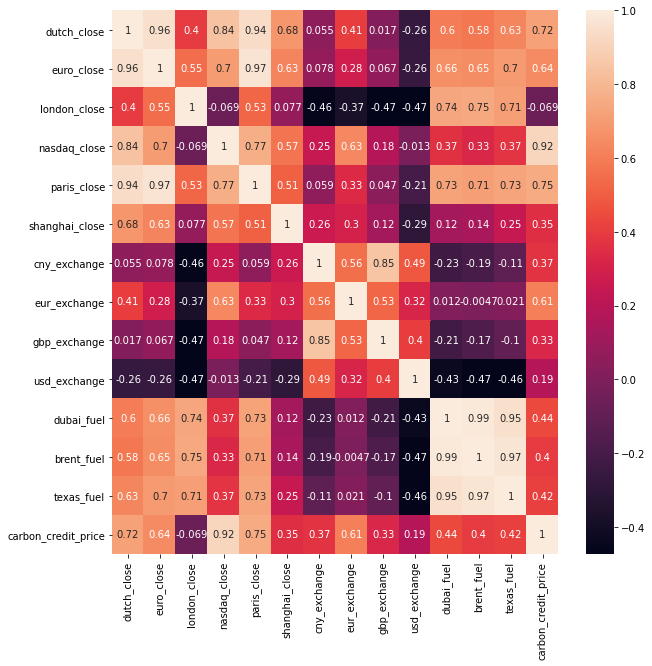

In [274]:
df = merge_df.copy()
df['carbon_credit_price'] = df['carbon_credit_price'].shift(20)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

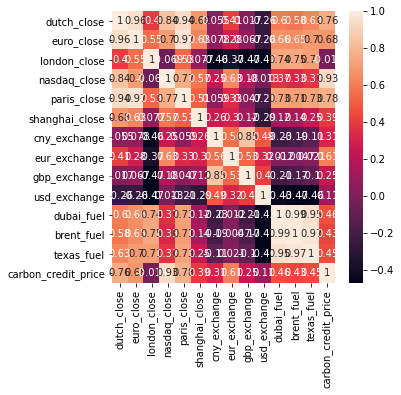

In [271]:
plt.figure(figsize=(5,5))
sns.heatmap(merge_df.corr(), annot=True)

### Regressor

In [400]:
x1 = merge_df.drop(['carbon_credit_price','date'],axis=1)
y1 = merge_df['carbon_credit_price']

In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score

In [401]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, random_state=100)

In [402]:
scaler = StandardScaler()
scaler.fit(x_train1)

x_train_scaled1 = scaler.transform(x_train1)
x_test_scaled1 = scaler.transform(x_test1)

In [403]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()

lr.fit(x_train_scaled1, y_train1)
lr_preds = lr.predict(x_test_scaled1)
print('LinearRegression')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lr_preds)))
print('r_score :', r2_score(y_test, lr_preds))
print()

rid.fit(x_train_scaled1, y_train1)
rid_preds = rid.predict(x_test_scaled1)
print('Ridge')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rid_preds)))
print('r_score :', r2_score(y_test1, rid_preds))
print()

las.fit(x_train_scaled1, y_train1)
las_preds = las.predict(x_test_scaled1)
print('Lasso')
print('rmse :', np.sqrt(mean_squared_error(y_test1, las_preds)))
print('r_score :', r2_score(y_test1, las_preds))
print()

xgb.fit(x_train_scaled1, y_train1)
xgb_preds = xgb.predict(x_test_scaled1)
print('XGBRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, xgb_preds)))
print('r_score :', r2_score(y_test1, xgb_preds))
print()

lgbm.fit(x_train_scaled1, y_train1)
lgbm_preds = lgbm.predict(x_test_scaled1)
print('LGBMRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lgbm_preds)))
print('r_score :', r2_score(y_test1, lgbm_preds))
print()

rfr.fit(x_train_scaled1, y_train1)
rfr_preds = rfr.predict(x_test_scaled1)
print('RandomForestRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rfr_preds)))
print('r_score :', r2_score(y_test1, rfr_preds))
print()

LinearRegression
rmse : 15.041803946996174
r_score : 0.9529656917468654

Ridge
rmse : 15.01788307621942
r_score : 0.9531151694283096

Lasso
rmse : 16.921056365975023
r_score : 0.9404790495228441

XGBRegressor
rmse : 5.961406963484271
r_score : 0.9926122455101068

LGBMRegressor
rmse : 6.260046378014654
r_score : 0.9918535196388419

RandomForestRegressor
rmse : 5.39924889938832
r_score : 0.9939398746092941



### classification

In [404]:
merge_df2 = merge_df.copy()
merge_df2.head(5)

,date,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
0,2021-11-01,15806.29,4280.47,7288.62,15595.92,6893.29,3544.48,184.34,1363.64,1608.89,1178.5,82.38,84.71,84.05,254.77
1,2021-10-29,15688.77,4250.56,7237.57,15498.39,6830.34,3547.34,183.35,1357.50,1606.33,1174.0,81.37,83.72,83.57,262.68
2,2021-10-28,15696.33,4233.87,7249.47,15448.12,6804.22,3518.42,183.04,1358.48,1610.84,1170.5,81.27,83.66,82.81,262.06
3,2021-10-27,15705.81,4220.88,7253.27,15235.84,6753.52,3562.31,183.56,1360.73,1609.51,1173.5,81.44,83.87,82.66,268.01
4,2021-10-26,15757.06,4223.97,7277.62,15235.72,6766.51,3597.64,183.02,1356.40,1613.44,1167.0,83.23,85.65,84.65,267.61


In [405]:
merge_df2['dutch_close'] = (merge_df2['dutch_close'].shift()-merge_df2['dutch_close'])/merge_df2['dutch_close']
merge_df2['euro_close'] = (merge_df2['euro_close'].shift()-merge_df2['euro_close'])/merge_df2['euro_close']
merge_df2['london_close'] = (merge_df2['london_close'].shift()-merge_df2['london_close'])/merge_df2['london_close']
merge_df2['nasdaq_close'] = (merge_df2['nasdaq_close'].shift()-merge_df2['nasdaq_close'])/merge_df2['nasdaq_close']
merge_df2['paris_close'] = (merge_df2['paris_close'].shift()-merge_df2['paris_close'])/merge_df2['paris_close']
merge_df2['shanghai_close'] = (merge_df2['shanghai_close'].shift()-merge_df2['shanghai_close'])/merge_df2['shanghai_close']

merge_df2['cny_exchange'] = (merge_df2['cny_exchange'].shift()-merge_df2['cny_exchange'])/merge_df2['cny_exchange']
merge_df2['eur_exchange'] = (merge_df2['eur_exchange'].shift()-merge_df2['eur_exchange'])/merge_df2['eur_exchange']
merge_df2['gbp_exchange'] = (merge_df2['gbp_exchange'].shift()-merge_df2['gbp_exchange'])/merge_df2['gbp_exchange']
merge_df2['usd_exchange'] = (merge_df2['usd_exchange'].shift()-merge_df2['usd_exchange'])/merge_df2['usd_exchange']

merge_df2['dubai_fuel'] = (merge_df2['dubai_fuel'].shift()-merge_df2['dubai_fuel'])/merge_df2['dubai_fuel']
merge_df2['brent_fuel'] = (merge_df2['brent_fuel'].shift()-merge_df2['brent_fuel'])/merge_df2['brent_fuel']
merge_df2['texas_fuel'] = (merge_df2['texas_fuel'].shift()-merge_df2['texas_fuel'])/merge_df2['texas_fuel']

merge_df2['carbon_credit_price'] = (merge_df2['carbon_credit_price'].shift()-merge_df2['carbon_credit_price'])/merge_df2['carbon_credit_price']
merge_df2['carbon_credit_price'] = merge_df2['carbon_credit_price'].apply(lambda x : 1 if x>0 else 0)

In [406]:
merge_df2 = merge_df2.dropna()

In [407]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [408]:
x2 = merge_df2.drop(['carbon_credit_price','date'],axis=1)
y2 = merge_df2['carbon_credit_price']

In [409]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,random_state=100)

In [410]:
log = LogisticRegression()
log.fit(x_train2, y_train2)

tree = DecisionTreeClassifier()
tree.fit(x_train2, y_train2)

gnb = GaussianNB()
gnb.fit(x_train2, y_train2)

rfc = RandomForestClassifier()
rfc.fit(x_train2, y_train2)

RandomForestClassifier()

In [411]:
from sklearn.metrics import accuracy_score

log_preds = log.predict(x_test2)
print('LogisticRegression')
print(accuracy_score(y_test2, log_preds))
print()

tree_preds = tree.predict(x_test2)
print('DecisionTreeClassifier')
print(accuracy_score(y_test2,tree_preds))
print()

gnb_preds = log.predict(x_test2)
print('GaussianNB')
print(accuracy_score(y_test2, gnb_preds))
print()

rfc_preds = tree.predict(x_test2)
print('RandomForestClassifier')
print(accuracy_score(y_test2,rfc_preds))
print()

LogisticRegression
0.5797546012269938

DecisionTreeClassifier
0.5460122699386503

GaussianNB
0.5797546012269938

RandomForestClassifier
0.5460122699386503



In [412]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test2, log_preds)
print(class_report)

class_report = classification_report(y_test2, tree_preds)
print(class_report)

class_report = classification_report(y_test2, gnb_preds)
print(class_report)

class_report = classification_report(y_test2, rfc_preds)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.20      0.33       166
           1       0.54      0.97      0.69       160

    accuracy                           0.58       326
   macro avg       0.71      0.59      0.51       326
weighted avg       0.71      0.58      0.51       326

              precision    recall  f1-score   support

           0       0.56      0.53      0.54       166
           1       0.54      0.56      0.55       160

    accuracy                           0.55       326
   macro avg       0.55      0.55      0.55       326
weighted avg       0.55      0.55      0.55       326

              precision    recall  f1-score   support

           0       0.87      0.20      0.33       166
           1       0.54      0.97      0.69       160

    accuracy                           0.58       326
   macro avg       0.71      0.59      0.51       326
weighted avg       0.71      0.58      0.51       326

              preci